In [20]:
import numpy as np
import matplotlib.pyplot as plt
import utils

### Given
- A 3x3 greyscale input image
- A CNN with the following layers:

Input -> Convolutional layer (2x2 kernel, 1 stride, no padding) -> FC layer

Input -> CNN -> Flatten -> FC

### Find
classify it as either 1 or 0

### Solution

In [21]:
SEED = 42
LEARNING_RATE = 0.01
MOMENTUM = 0.9
EPOCHS = 1000

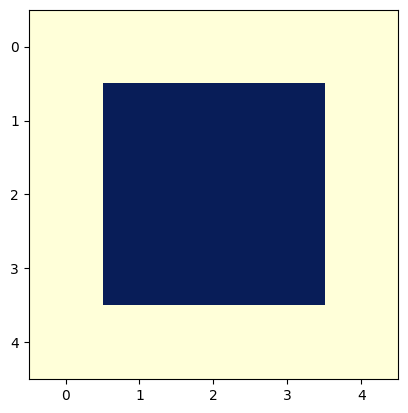

In [22]:
# Set seed to reproduce results
np.random.seed(SEED)

# Input: random 5x5 integer matrix
# 3 classes: Triangle (0),  Line (1), Square (2)
input_triangle = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0]
])
input_square = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])

TRIANGLE = np.array([1., 0.])
SQUARE = np.array([0., 1.])

input, y = input_square, SQUARE
utils.display_images([input])

### TODO Forward pass:

- [x] Create Filter (Sobel filter X-direction)
- [x] Create activation function (ReLU)
- [x] Create activation function (Softmax)
- [x] Apply convolution between Input and Filter (X)
- [x] Apply activation function on X
- [x] Flatten convolution output (XX)
- [x] Pass through Fully Connected Layer
- [ ] Error function
- [ ] Calculate cost with error-function (Binary cross-entropy)
- [ ] Create a minor dataset

In [23]:
# ReLU = max(0, x)
def ReLU(x: np.ndarray):
    return np.maximum(0, x)

# d_ReLU = 1 if x > 0 else 0
def d_ReLU(x: np.ndarray):
    return 1 * (x > 0)

def sigmoid(x: np.ndarray):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x: np.ndarray):
    return sigmoid(x) * (1 - sigmoid(x))

def cross_entropy_loss(y_hat: np.ndarray, y: np.ndarray) -> np.ndarray:
    # Make sure not to take log(0)
    return -np.sum(y * np.log(y_hat + 10**-100))

def d_cross_entropy_loss(y_hat: np.ndarray, y: np.ndarray):
    # Make sure not to divide by 0
    return - y / (y_hat + 10**-100)

In [24]:
# filter = sobel filter, x-direciton
# filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filter = np.array([[1, 0, 1], [1, 2, 1], [0, 1, 0]])

# https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
# https://github.com/macbuse/macbuse.github.io/blob/master/PROG/convolve.py
def convolve2D(image: np.ndarray, kernel: np.ndarray, padding = 0, stride = 1):
    # Stride: 1, Padding: 0, Kernel: 3x3, Input: 5x5, Output: 3x3

    # Cross correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather shapes of kernel + image + padding
    x_kernel_size, y_kernel_size = kernel.shape
    x_image_size, y_image_size = image.shape[0:2]

    # Pad the image if padding is not 0
    image_padded = np.pad(image, padding, mode='constant', constant_values=(0))

    # Output matrix size: [(n_in - kernel_size + 2*padding) / stride] + 1
    x_output = int(((x_image_size - x_kernel_size + 2 * padding) / stride) + 1)
    y_output = int(((y_image_size - y_kernel_size + 2 * padding) / stride) + 1)
    output = np.zeros((x_output, y_output))

    # Convolution
    for y in range(0, y_image_size - y_kernel_size, stride):
        for x in range(0, x_image_size - x_kernel_size, stride):
            output[x, y] = (kernel * image_padded[x: x + x_kernel_size, y: y + y_kernel_size]).sum()
    
    return output

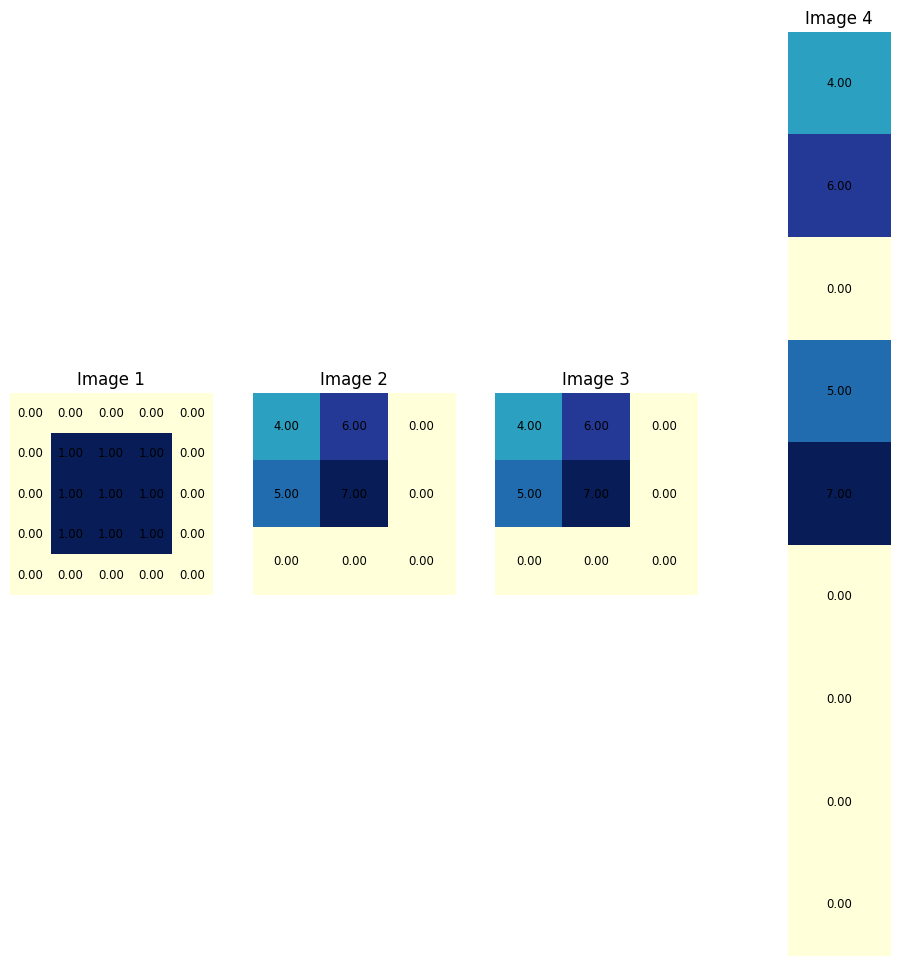

In [25]:
# Output without activation function
z1 = convolve2D(input, filter)

# Output with activation function
a1 = ReLU(z1)

# Flattened output
a1_flat = a1.reshape(-1, 1)

utils.display_images([input, z1, a1, a1_flat])

---
**Initialize weights and biases**

In [26]:
np.random.seed(SEED)

input_nodes = a1_flat.shape[0]
output_nodes = 1

w1 = np.random.random(size = (output_nodes, input_nodes))
b1 = np.random.random(size = (output_nodes, 1))

**Forward propagation before training**

In [27]:
z2 = w1.dot(a1_flat) + b1
y_hat = sigmoid(z2)

In [28]:
L = cross_entropy_loss(y_hat, y)
L

6.169178455870127e-06

### Backward propagation
Want to minimize the cross entropy loss by adjusting the weights, biases and filter-kernel.

In [29]:
# Initialize the update-vectors which will store the partial derivatives, i.e. the gradients of the loss function with respect to the weights and biases.
update_w1 = np.zeros(w1.shape)
update_b1 = np.zeros(b1.shape)

print(update_w1.shape)
print(update_b1.shape)

(1, 9)
(1, 1)


In [47]:
for epoch in range(EPOCHS):
    # Forward propagation
    
    z2 = w1.dot(a1_flat) + b1
    y_hat = sigmoid(z2)

    print(z2.shape)
    print(y_hat.shape)

    L = cross_entropy_loss(y_hat, y)
    # print(f"Epoch: {epoch}, Loss: {L}")

    # ------------------- Backpropagation -------------------

    delta = d_cross_entropy_loss(y_hat, y) * d_sigmoid(z2)
    print(y_hat)
    print(y)
    print(delta.shape)
    print(a1_flat.shape)

    print(delta * a1_flat)
    grad_w1 = delta.dot(a1_flat.T)
    grad_b1 = delta


    # error_upto_softmax = np.sum(d_cross_entropy_loss(y_hat, y) * d_softmax(z2), axis = 0).reshape((-1, 1))
    # grad_w2 = error_upto_softmax.dot(out_hidden_1.T)
    # grad_b2 = error_upto_softmax

    # # -----------------------------

    # error_grad_upto_H1 = np.sum(error_upto_softmax * w2, axis = 0).reshape((-1, 1))
    # grad_w1 = error_grad_upto_H1 * d_ReLU(in_hidden_1).dot(output_flat.T)
    # grad_b1 = error_grad_upto_H1 * d_ReLU(in_hidden_1)


    # -----------------------------

    # Update the weights and biases
    update_w1 = update_w1 * MOMENTUM - LEARNING_RATE * grad_w1
    update_b1 = update_b1 * MOMENTUM - LEARNING_RATE * grad_b1
    w1 += update_w1
    b1 += update_b1

(1, 1)
(1, 1)
[[0.99999383]]
[0. 1.]
(1, 2)
(9, 1)


ValueError: shapes (1,2) and (9,1) not aligned: 2 (dim 1) != 9 (dim 0)

**Forward propagation after training**

In [43]:
in_hidden_1 = w1.dot(output_flat) + b1
out_hidden_1 = ReLU(in_hidden_1)

in_output_layer = w2.dot(out_hidden_1) + b2
y_hat = softmax(in_output_layer)

L = cross_entropy_loss(y_hat, y)
L

6.568645008701271

In [44]:
# dZ = dL/dy_hat, the derivative of the loss function with respect to the output of the softmax
# error_upto_softmax = np.sum(d_cross_entropy_loss(y_hat, y) * d_softmax(in_output_layer), axis=0).reshape((-1, 1))
error_upto_softmax = d_cross_entropy_loss(y_hat, y).dot(d_softmax(in_output_layer)).reshape((-1, 1))
grad_weights = error_upto_softmax.dot(output_flat.reshape((1, -1)))
grad_bias = error_upto_softmax

# dL/dy_hat
# d_cross_entropy_loss(y_hat, y).dot(d_softmax(in_output_layer)).reshape((-1, 1))
y_hat

# dW = dy_hat/dW, the derivative of the output of the softmax with respect to the weights
# d_y_hat = d_softmax(y_hat)

# dW = dL/dweights = dL/dy_hat * dy_hat/dweights = dZ * dW, the derivative of the loss function with respect to the weights
# d_weights = np.dot(dZ, d_y_hat)

# weights = weights - LEARNING_RATE * d_weights

array([[0.00637765],
       [0.66028901],
       [0.33333333]])

In [50]:
a = np.array(2)
softmax(a)

1.0